# Análisis de Datos de Global Superstore

El dataset de Kaggle Global Superstore es un conjunto de datos completo que contiene información sobre ventas y pedidos en una supertienda global. Es un recurso valioso para tareas de análisis y visualización de datos. Este dataset ha sido procesado y transformado de su formato original (txt) a CSV utilizando el lenguaje de programación R. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mstats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('D:\Global Superstore Dataset\superstore.csv')
#importamos el archivo csv

In [3]:
df.info()
#nos muestra la información de las columnas, donde observamos que se tiene variables de tipo object, int y float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [4]:
df.head(5)
#nos muestra las primeras 5 filas del dataset, las cuales incluyen el encabezado y los datos de las columnas

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [5]:
df.describe() .T
#nos muestra un resumen estadístico, aplicando traspuesta para que sea más fácil de leer

,count,mean,std,min,25%,50%,75%,max
Discount,51290.0,0.142908,0.212280,0.000,0.00,0.00,0.20,0.850
记录数,51290.0,1.000000,0.000000,1.000,1.00,1.00,1.00,1.000
Profit,51290.0,28.610982,174.340972,-6599.978,0.00,9.24,36.81,8399.976
Quantity,51290.0,3.476545,2.278766,1.000,2.00,3.00,5.00,14.000
Row.ID,51290.0,25645.500000,14806.291990,1.000,12823.25,25645.50,38467.75,51290.000
Sales,51290.0,246.498440,487.567175,0.000,31.00,85.00,251.00,22638.000
Shipping.Cost,51290.0,26.375818,57.296810,0.002,2.61,7.79,24.45,933.570
Year,51290.0,2012.777208,1.098931,2011.000,2012.00,2013.00,2014.00,2014.000
weeknum,51290.0,31.287112,14.429795,1.000,20.00,33.00,44.00,53.000


In [6]:
df.drop(columns='记录数', inplace=True)
#eliminamos la columna '记录数' que en español se traduce como 'Número de registros' ya que no es necesaria

In [7]:
df.isnull().sum()
#verificamos si existen valores nulos en el dataset

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

# 📊 Análisis Estratégico del Rendimiento del Negocio de Global Superstore

El análisis de datos de **Global Superstore** se centra en proporcionar una visión más detallada y estratégica del rendimiento del negocio mediante la identificación y evaluación de varios **KPIs** (Key Performance Indicators). Estos KPIs son esenciales para comprender aspectos críticos del negocio, tales como el valor del cliente a lo largo del tiempo, la eficiencia de las ventas y el crecimiento del negocio. A continuación, se realizara el 🔍 Exploratory Data Analysis (EDA) y se presentaran algunas referencias bibliográficas que sustentan la importancia de estos KPIs en el análisis de datos empresariales.




## 📈 Eficiencia de las Ventas

La eficiencia de las ventas se puede medir a través de indicadores como el **Average Order Value (AOV)** y la frecuencia de órdenes por cliente. Estos KPIs ayudan a las empresas a evaluar el rendimiento de sus estrategias de ventas y a identificar oportunidades para aumentar el valor de las órdenes y la frecuencia de compra. Kotler y Keller (2016) destacan la importancia de estos indicadores para optimizar las estrategias de ventas y maximizar los ingresos.

> **Referencia:** Kotler, P., & Keller, K. L. (2016). *Marketing Management* (15th ed.). Pearson.

## 💡 Valor del Cliente a lo Largo del Tiempo

El valor del cliente a lo largo del tiempo, también conocido como **Customer Lifetime Value (CLV)**, es un indicador clave que permite a las empresas medir el valor total que un cliente aporta durante toda su relación con la empresa. Según Gupta y Lehmann (2005), el CLV es fundamental para la toma de decisiones estratégicas en marketing y gestión de clientes, ya que permite identificar a los clientes más valiosos y diseñar estrategias para retenerlos.

> **Referencia:** Gupta, S., & Lehmann, D. R. (2005). *Managing Customers as Investments: The Strategic Value of Customers in the Long Run*. Wharton School Publishing.

In [ ]:
# Calcular el valor promedio de las órdenes y otras métricas clave (vectorizado)
df['Order.Value'] = df['Sales'] - df['Shipping.Cost']
df['Order.Count'] = df.groupby('Customer.ID')['Order.ID'].transform('count')
df['Avg.Order.Value'] = df.groupby('Customer.ID')['Order.Value'].transform('mean')
df['Profit.Avg'] = df.groupby('Customer.ID')['Profit'].transform('mean')

# Tasa de retención 
retention_rate = 0.8  # Ejemplo: 80% de retención anual

# Tasa de descuento 
discount_rate = 0.1  # Ejemplo: 10% de descuento anual

# CLV más preciso (fórmula simplificada)
df['CLV'] = (df['Avg.Order.Value'] * df['Order.Count'] * retention_rate) / (1 + discount_rate - retention_rate)


# Segmentación de Clientes en las empresas

La segmentación de clientes es una técnica crucial en el análisis de datos de Global Superstore, ya que permite a la empresa identificar y comprender mejor a sus diferentes grupos de clientes. Al dividir a los clientes en segmentos basados en características específicas como el **Customer Lifetime Value (CLV)** y el **Profit Average**, la empresa puede desarrollar estrategias de marketing y retención más efectivas y personalizadas.

### Beneficios de la Segmentación de Clientes

1. **Estrategias de Marketing Personalizadas**:
   - Permite crear campañas de marketing dirigidas a segmentos específicos, aumentando la relevancia y efectividad de las comunicaciones.

2. **Optimización de Recursos**:
   - Ayuda a asignar recursos de manera más eficiente, enfocándose en los segmentos de clientes más valiosos y rentables.

3. **Mejora de la Retención de Clientes**:
   - Facilita la identificación de clientes con alto CLV, permitiendo implementar programas de fidelización y retención para maximizar su valor a largo plazo.

4. **Identificación de Oportunidades de Crecimiento**:
   - Revela patrones y tendencias en el comportamiento de los clientes, proporcionando información valiosa para identificar oportunidades de upselling y cross-selling.

5. **Toma de Decisiones Informadas**:
   - Proporciona una base sólida para la toma de decisiones estratégicas, basadas en datos y análisis detallados de los diferentes segmentos de clientes.

En resumen, la segmentación de clientes es una herramienta poderosa que permite a las empresas el valor de sus clientes, optimizar sus estrategias de marketing y mejorar la eficiencia operativa. Al comprender mejor a sus clientes, la empresa puede tomar decisiones más informadas y estratégicas, impulsando el crecimiento y la rentabilidad a largo plazo.

In [9]:
# Crear un DataFrame con Customer Lifetime Value (CLV) y Profit Avg para el clustering
comparison_df = df.groupby('Customer.ID')[['CLV', 'Profit.Avg']].first().reset_index()


In [10]:
# Manejo de outliers (Winsorizing)
comparison_df['CLV_winsorized'] = mstats.winsorize(comparison_df['CLV'], limits=[0.01, 0.01])
comparison_df['Profit.Avg_winsorized'] = mstats.winsorize(comparison_df['Profit.Avg'], limits=[0.01, 0.01])


In [11]:
# Escalamiento de datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(comparison_df[['CLV_winsorized', 'Profit.Avg_winsorized']])


In [12]:
# Determinar el número óptimo de clusters usando el método del codo y silhouette score
sse = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)

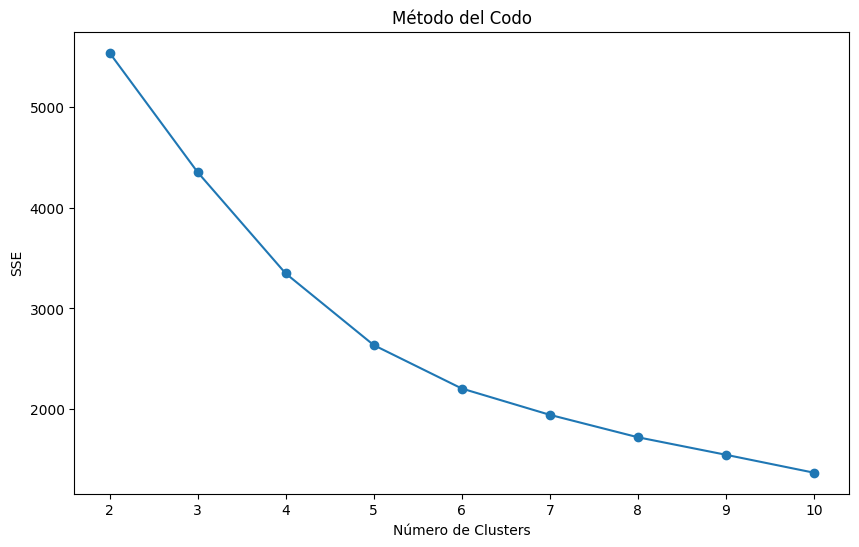

In [13]:
# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sse, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.show()

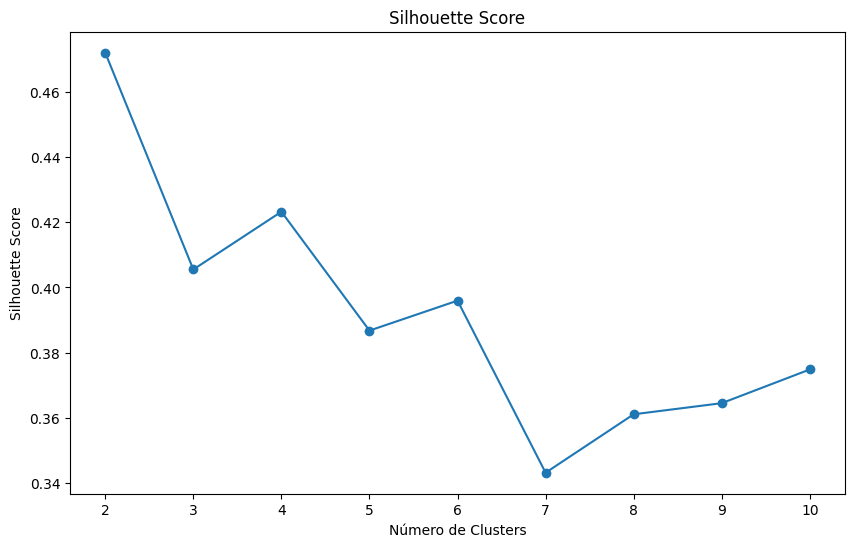

In [14]:
# Graficar el silhouette score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## Selección del Número de Clusters (k)

Para determinar el número óptimo de clusters para el algoritmo K-Means, se utilizaron el método del codo y el análisis del *silhouette score*.

*   **Método del Codo:** El gráfico del método del codo muestra la suma de cuadrados explicada (SSE) para diferentes valores de k.  Se busca el "codo" en la curva, donde la disminución de SSE comienza a ser menos pronunciada.  En este caso, el codo más evidente se encuentra en k=4.

*   **Silhouette Score:**  El gráfico del *silhouette score* muestra la calidad de la separación entre clusters para diferentes valores de k.  Un valor más cercano a 1 indica una mejor separación.  Si bien el *silhouette score* más alto se observa para k=2, el valor para k=4 (aproximadamente 0.42) sigue siendo razonable y considerablemente mejor que para valores de k mayores.

Considerando un equilibrio entre la reducción de SSE (método del codo) y una separación aceptable entre clusters (silhouette score), junto con la necesidad de obtener segmentos de clientes interpretables y accionables, se elige **k=4** como el número óptimo de clusters. Esta elección permite identificar patrones significativos en los datos sin una complejidad excesiva del modelo.

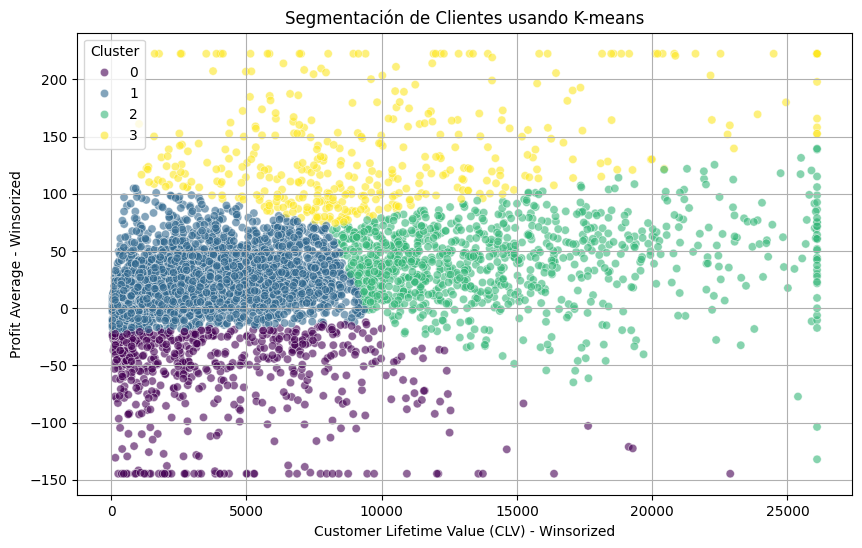

In [ ]:
# Eleccion del número óptimo de clusters 
n_clusters = 4

# Entrenar el modelo K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(data_scaled)

# Añadir los labels de los clusters al DataFrame
comparison_df['Cluster'] = kmeans.labels_

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CLV_winsorized', y='Profit.Avg_winsorized', hue='Cluster', data=comparison_df, palette='viridis', alpha=0.6)
plt.title('Segmentación de Clientes usando K-means')
plt.xlabel('Customer Lifetime Value (CLV) - Winsorized')
plt.ylabel('Profit Average - Winsorized')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [23]:
# Análisis de los clusters (estadísticas resumidas)
cluster_summary = comparison_df.groupby('Cluster').agg({
    'CLV': ['mean', 'median', 'std', 'min', 'max'],
    'Profit.Avg': ['mean', 'median', 'std', 'min', 'max']
})
print(cluster_summary)


                  CLV                                                        \
                 mean        median          std          min           max   
Cluster                                                                       
0         4224.185194   3141.480000  3632.288700    38.880000  22884.426667   
1         3251.829603   2765.520000  2449.553207     4.853333   9357.786667   
2        14520.710693  13145.666667  5283.444570  8180.240000  66208.169333   
3        10307.700823   8689.680000  6726.419312  1027.493333  49538.640000   

         Profit.Avg                                                   
               mean      median         std         min          max  
Cluster                                                               
0        -68.444074  -46.325900   81.194301 -896.280000   -12.184225  
1         23.032306   19.687390   22.847456  -21.268500   104.760000  
2         41.295159   43.238307   32.745955 -132.049287   139.509311  
3        155.047122 

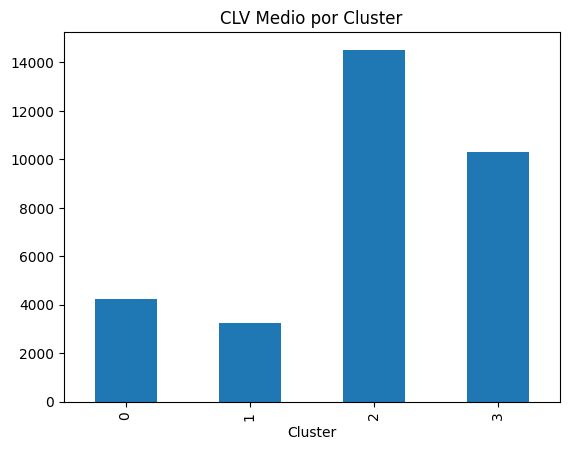

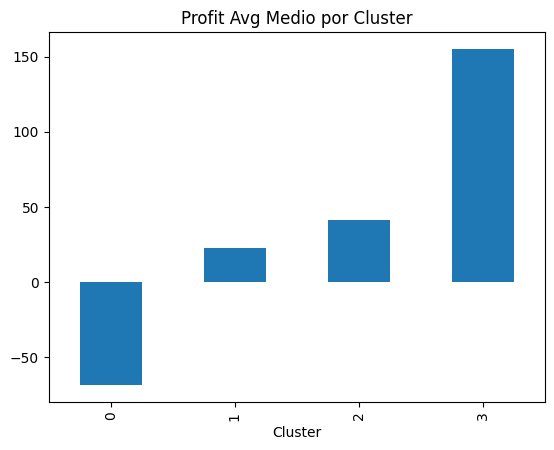

In [26]:
# Visualización de las medias de CLV y Profit Avg por cluster
cluster_summary['CLV']['mean'].plot(kind='bar', title='CLV Medio por Cluster')
plt.show()
cluster_summary['Profit.Avg']['mean'].plot(kind='bar', title='Profit Avg Medio por Cluster')
plt.show()

In [27]:
# Unir los resultados del clustering con el DataFrame original
df_clustered = df.merge(comparison_df[['Customer.ID', 'Cluster']], on='Customer.ID', how='left')



Distribución de Categorías por Cluster:
Category  Furniture  Office Supplies  Technology
Cluster                                         
0          0.205393         0.595559    0.199048
1          0.176126         0.645221    0.178653
2          0.211341         0.573657    0.215002
3          0.195671         0.561147    0.243182


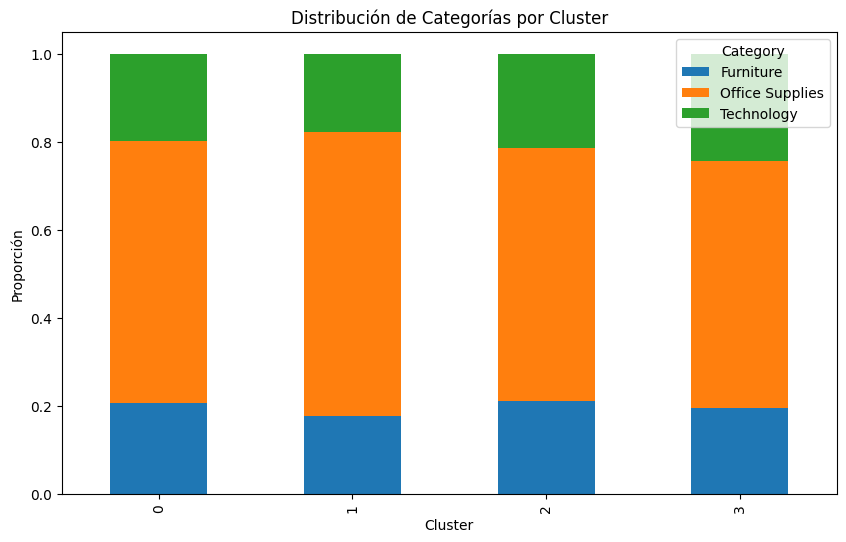


Distribución de Segmentos por Cluster:
Segment  Consumer  Corporate  Home Office
Cluster                                  
0        0.494449   0.314433     0.191118
1        0.516465   0.296779     0.186755
2        0.521568   0.308312     0.170121
3        0.530222   0.272421     0.197357

Distribución de Regiones por Cluster:
Region     Africa    Canada  Caribbean   Central  Central Asia      EMEA  \
Cluster                                                                    
0        0.151665       NaN   0.027756  0.176249      0.021015  0.215900   
1        0.131924  0.013838   0.037905  0.206089      0.020296  0.137860   
2        0.009010       NaN   0.028945  0.244453      0.069321  0.012558   
3        0.104864  0.010964   0.025583  0.210571      0.057633  0.078718   

Region       East     North  North Asia   Oceania     South  Southeast Asia  \
Cluster                                                                       
0        0.052934  0.072561    0.025971  0.047581  0.1

In [29]:
# Análisis por cluster (ejemplos - MEJORADO)
print("\nDistribución de Categorías por Cluster:")
cat_dist = df_clustered.groupby('Cluster')['Category'].value_counts(normalize=True).unstack()
print(cat_dist)
# Gráfico de barras apiladas (opcional)
cat_dist.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de Categorías por Cluster')
plt.ylabel('Proporción')
plt.show()

print("\nDistribución de Segmentos por Cluster:")
seg_dist = df_clustered.groupby('Cluster')['Segment'].value_counts(normalize=True).unstack()
print(seg_dist)

print("\nDistribución de Regiones por Cluster:")
reg_dist = df_clustered.groupby('Cluster')['Region'].value_counts(normalize=True).unstack()
print(reg_dist)
#Para mostrar solo las 5 regiones mas importantes por cluster:
# reg_dist = df_clustered.groupby('Cluster')['Region'].value_counts(normalize=True).unstack().fillna(0)
# top_5_regions = reg_dist.apply(lambda x: x.nlargest(5).index.tolist(), axis=1)
# print(top_5_regions)

## Análisis de Segmentación de Clientes: Identificando Oportunidades de Crecimiento y Rentabilidad

Este análisis de segmentación de clientes, utilizando K-Means (k=4), identifica cuatro grupos distintos con comportamientos de compra y rentabilidad diferentes. Se basa en el Customer Lifetime Value (CLV), Profit Average (beneficio promedio), y se complementa con la distribución por categoría de producto, segmento de cliente y región. El objetivo es proporcionar recomendaciones *específicas* para cada segmento, optimizando las estrategias de marketing y ventas.


### Análisis Detallado por Cluster

A continuación, se detalla cada cluster, incluyendo su composición (categoría, segmento, región) y las acciones recomendadas:

*   **Cluster 0: Bajo Valor y No Rentables (¡Alerta Roja!)**

    *   **Descripción:**  Segmento más problemático. CLV bajo y *Profit Avg negativo*.  En promedio, *se pierde dinero* con cada transacción.
    *   **Composición:** Predominan las compras de *Office Supplies* (casi 60%). Principalmente clientes del segmento *Consumer* (49%), con presencia en *EMEA*, *Central* y *Africa*.
    *   **Hipótesis:** Bajos márgenes en Office Supplies, altos costos de envío a ciertas regiones, devoluciones/reembolsos, o posible fraude.
    *   **Acciones Urgentes:**
        1.  **Investigación Profunda:** Análisis *inmediato* de transacciones (Office Supplies en EMEA, Central y Africa). Identificar causas de pérdidas.
        2.  **Revisión de Precios y Descuentos:** Evaluar la política en Office Supplies, especialmente para el segmento Consumer.
        3.  **Optimización Logística:** Explorar opciones para reducir costos de envío.
        4.  **Considerar Desvinculación:** Si no se corrigen las causas, considerar *desvincular* este segmento.

*   **Cluster 1: Bajo Valor y Baja Rentabilidad (Oportunidad de Mejora)**

    *   **Descripción:** Ligeramente rentable, pero con bajo CLV y Profit Avg. Oportunidad de crecimiento.
    *   **Composición:** Alta concentración en *Office Supplies* (más del 64%), principalmente segmento *Consumer*, con presencia en *Central*, *EMEA* y *Africa*.
    *   **Acciones:**
        *   **Upselling/Cross-selling (Office Supplies):** Aumentar el valor promedio de los pedidos con paquetes, descuentos por volumen o productos complementarios de mayor margen.
        *   **Programa de Lealtad (Básico):** Incentivar la compra repetida.

*   **Cluster 2: Alto Valor, Rentabilidad Moderada (Potencial de Oro)**

    *   **Descripción:** Segmento de *muy alto valor* a largo plazo (mayor CLV), pero con rentabilidad actual moderada. Gran potencial.
    *   **Composición:**  Mayor presencia de *Technology* y *Furniture* (21% aprox. c/u) que Clusters 0 y 1. Predominantemente *Consumer* (52%), con presencia en *Central*, *South* y *Oceania*.
        **(Insertar aquí el gráfico de barras apiladas de categorías, o un gráfico similar para segmentos/regiones si es relevante)**

    *   **Acciones:**
        *   **Upselling (Technology y Furniture):** Ofertas personalizadas de productos de *mayor margen* en estas categorías.
        *   **Programas de Fidelización VIP**: para mantener y fortalecer la relación.
        *   **Cross-Selling Selectivo:** Productos complementarios de *alto margen*.

*   **Cluster 3: Valor Moderado-Alto y Muy Rentables (Los Campeones)**

    *   **Descripción:**  Segmento *más rentable* actualmente. Mayor Profit Avg, con CLV alto.
    *   **Composición:**  Mayor proporción de *Technology* (24.3%) de todos los clusters. Principalmente *Consumer* (53%), presencia en *Central*, *South*, *Africa* y *North*.
    *   **Acciones:**
        *   **Retención Prioritaria:**  *Experiencia de compra excepcional*. Atención prioritaria, ofertas exclusivas.
        *   **Marketing de Referencia:** Incentivar recomendaciones.
        *   **Análisis de Productos Estrella:** Identificar productos con mayor rentabilidad y promocionarlos a otros grupos.
        *   **Mantener (y Optimizar) la Frecuencia:** Estrategias para *mantener/aumentar* la frecuencia de compra.

### Distribución de Categorías, Segmentos y Regiones
**(Insertar tablas o graficos de distribucion por categoria, segmento y region por cluster)**

### Conclusiones y Próximos Pasos

Este análisis proporciona una hoja de ruta para optimizar estrategias. Se recomiendan las acciones específicas para cada cluster, pruebas A/B para medir la efectividad y monitoreo continuo.  La investigación del Cluster 0 es *fundamental*. La segmentación es un proceso continuo, y se debe revisar periódicamente.